<a href="https://colab.research.google.com/github/Prashantlondhe123/ML-Project/blob/main/Digits_Classification_using_Genetic_Algorithm(sklearn_genetic_opt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digits Classification using Genetic Algorithm(sklearn-genetic-opt)
##

In [6]:
pip install sklearn-genetic-opt

In [7]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn_genetic.callbacks import DeltaThreshold, TimerStopping

##Import the data and split it in train and test sets

In [8]:
data = load_digits()
label_names = data["target_names"]
y = data["target"]
X = data["data"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##Define the classifier to tune and the param grid

In [9]:
clf = DecisionTreeClassifier()

params_grid = {
    "min_weight_fraction_leaf": Continuous(0, 0.5),
    "criterion": Categorical(["gini", "entropy"]),
    "max_depth": Integer(2, 20),
    "max_leaf_nodes": Integer(2, 30),
}

##Create the CV strategy and optionally some callbacks

In [10]:
cv = StratifiedKFold(n_splits=3, shuffle=True)

delta_callback = DeltaThreshold(threshold=0.001, metric="fitness")
timer_callback = TimerStopping(total_seconds=60)

callbacks = [delta_callback, timer_callback]

##Define the GASearchCV options

In [11]:
evolved_estimator = GASearchCV(
    clf,
    cv=cv,
    scoring="accuracy",
    population_size=16,
    generations=30,
    crossover_probability=0.9,
    mutation_probability=0.05,
    param_grid=params_grid,
    algorithm="eaSimple",
    n_jobs=-1,
    verbose=True)

##Fit the model and see some results

In [12]:
evolved_estimator.fit(X_train, y_train, callbacks=callbacks)
y_predict_ga = evolved_estimator.predict(X_test)
accuracy = accuracy_score(y_test, y_predict_ga)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	16    	0.348712	0.165854   	0.738155   	0.190357   
1  	14    	0.462438	0.152882   	0.738155   	0.299252   
2  	12    	0.583022	0.142689   	0.752286   	0.33749    
3  	14    	0.701839	0.0503182  	0.76143    	0.60931    
4  	14    	0.729946	0.0281108  	0.76143    	0.633416   
5  	8     	0.74096 	0.0141645  	0.76143    	0.719867   
6  	14    	0.738986	0.0145202  	0.76143    	0.715711   
7  	14    	0.720802	0.047032   	0.76143    	0.544472   
8  	10    	0.733479	0.0148812  	0.76143    	0.708229   
9  	14    	0.732751	0.0160999  	0.769742   	0.716542   
INFO: DeltaThreshold callback met its criteria
INFO: Stopping the algorithm


In [13]:
print(evolved_estimator.best_params_)
print("accuracy score: ", "{:.2f}".format(accuracy))

{'min_weight_fraction_leaf': 0.030075144501579554, 'criterion': 'entropy', 'max_depth': 18, 'max_leaf_nodes': 29}
accuracy score:  0.76


In [14]:
evolved_estimator.predict(X_test)

array([6, 9, 3, 7, 6, 8, 8, 3, 5, 7, 1, 1, 4, 0, 6, 8, 3, 7, 8, 8, 4, 3,
       9, 7, 8, 6, 3, 8, 6, 7, 6, 9, 3, 6, 8, 6, 9, 4, 7, 6, 6, 9, 6, 7,
       6, 1, 3, 0, 6, 5, 5, 1, 5, 5, 6, 0, 3, 0, 0, 1, 5, 4, 5, 8, 6, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 6, 8, 5, 9, 9, 0, 2, 9, 8, 0, 6, 4,
       6, 9, 1, 2, 8, 3, 5, 7, 9, 4, 8, 4, 4, 3, 5, 3, 1, 1, 5, 1, 4, 8,
       9, 7, 4, 6, 1, 9, 8, 7, 8, 7, 2, 6, 9, 5, 0, 6, 0, 7, 5, 8, 7, 5,
       7, 9, 0, 6, 6, 1, 2, 8, 0, 9, 4, 6, 9, 1, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 3, 3, 3, 5, 7, 6, 9, 0, 6, 5, 2, 6, 5, 7, 9, 1, 4, 8, 1, 3,
       7, 5, 2, 2, 3, 9, 8, 0, 3, 8, 1, 5, 6, 9, 9, 8, 6, 0, 1, 8, 3, 6,
       1, 8, 5, 9, 5, 7, 1, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 5, 8,
       8, 7, 7, 6, 4, 6, 6, 4, 9, 2, 3, 6, 7, 1, 5, 3, 4, 7, 6, 5, 8, 5,
       5, 1, 4, 8, 8, 8, 9, 5, 7, 0, 2, 2, 2, 3, 6, 8, 5, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 7, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 1, 0, 5, 8, 3, 4, 0, 8,

In [16]:
y_predicy_ga=evolved_estimator.predict(X_test)

In [17]:
accuracy_score(y_test,y_predicy_ga)

0.7575757575757576

In [19]:
import matplotlib.pyplot as plt


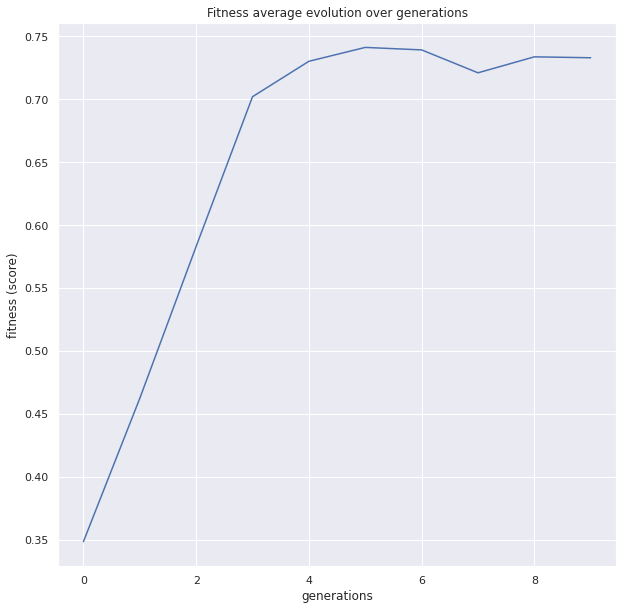

In [20]:
from sklearn_genetic.plots import plot_fitness_evolution
plot_fitness_evolution(evolved_estimator)
plt.show()